### **HISTOGRAM OF ORIENTED GRADIENTS (HOG)**

*   **HOG descriptors** are mainly used in computer vision and machine learning for **object detection**.
*   However, we can also use HOG descriptors for **quantifying and representing both shape and texture.**
*   HOG has **five stages** namely,
    
    1.	Normalizing the image prior to description.
    2.	Computing gradients in both the x and y directions.
    3.	Obtaining weighted votes in spatial and orientation cells.
    4.	Contrast normalizing overlapping spatial cells.
    5.	Collecting all Histograms of Oriented gradients to form the final feature vector.
* The most **important parameters** for the HOG descriptor are the **orientations**, **pixels_per_cell** and the **cells_per_block**.
*   These three parameters (**along with the size of the input image**) effectively **control the dimensionality of the resulting feature vector**.    
* In most real-world applications, **HOG is used in conjunction with a Linear SVM to perform object detection**.
* The **reason HOG is utilized** so heavily is because **local object appearance and shape can be characterized using the distribution of local intensity gradients**.
* However, since **HOG captures local intensity gradients and edge directions**, it also makes for a good texture descriptor.
* The HOG descriptor **returns a real-valued feature vector**.  
* HOG is implemented in **both OpenCV** and **scikit-image**.
* The OpenCV implementation is less flexible than the scikit-image implementation, and thus we will primarily used the **scikit-image implementation**.

### **How do HOG descriptors work?**
* The cornerstone of the HOG descriptor algorithm is that **appearance of an object can be modeled by the distribution of intensity gradients inside rectangular regions of an image**.
* Implementing this descriptor requires **dividing the image into small connected regions called cells, and then for each cell, computing a histogram of oriented gradients for the pixels within each cell.**
* We can then **accumulate these histograms across multiple cells to form our feature vector.**

Mounted at /content/drive


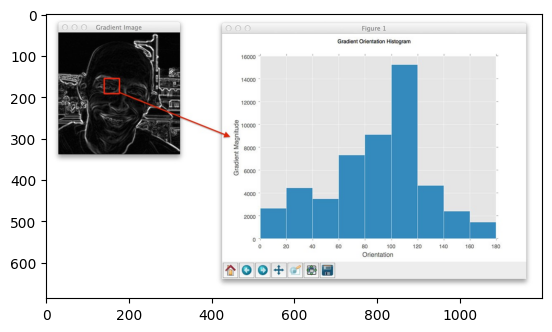

In [6]:
# prompt: add an image from google drive and display it

from google.colab import drive
drive.mount('/content/drive')

# Load the image from Google Drive
image_path = '/content/drive/MyDrive/MIT/Work/Machine_Learning/Google_Colab/Machine_Learning/Image_Descriptors/Image_Descriptors_HOG/Oriented_Gradients.jpg'

# Import necessary libraries
import matplotlib.pyplot as plt

# Read the image
image = plt.imread(image_path)

# Display the image
plt.imshow(image)
plt.show()

### **Step 1: NORMALIZING THE IMAGE PRIOR TO DESCRIPTION**
* This **normalization step is** entirely **optional**, but in some cases this step can improve performance of the HOG descriptor.
* There are **three main normalization methods** that we can consider:
	1. **Gamma/power law normalization**: In this case, we take the **log(p)** of each **pixel p** in the input image.
	2. **Square-root normalization**: Here, we take the **√(p) of each pixel p** in the input image. **Square-root normalization compresses the input pixel intensities far less than gamma normalization**.
	3. **Variance normalization**: A slightly less used form of normalization is variance normalization. Here, we **compute** both the **mean µ** and **standard deviation σ** of the input image. **All pixels are mean centered by subtracting the mean from the pixel intensity, and then normalized through dividing by the standard deviation**: . **p'=(p-μ)/σ**.
* In most cases, it’s **best to start with either no normalization or square-root normalization.**

### **Step 2: GRADIENT COMPUTATION**
* The first actual step in the HOG descriptor is to **compute the image gradient in both the x and y direction**.
* We will **apply a convolution operation** to obtain the gradient images,
    **Gx = I * Dx**    and  **Gy = I * Dy**
  where **I** is the **input image**,  **Dx** is our **filter in the x-direction**, and **Dy** is our **filter in the y-direction**.
* Now that we have our gradient images, we can **compute the final gradient magnitude representation of the image**,
    **|G|= √((Gx)^2 + (Gy)^2)**
* Finally, the **orientation of the gradient for each pixel** in the input image can then be **computed** by,
    **Ɵ = tan^(-1) (Gy/Gx)**
* Given both |G| and Ɵ, we can now **compute a histogram of oriented gradients**, where the **bin of the histogram is based on Ɵ** and the **contribution or weight added to a given bin of the histogram is based on |G|** .


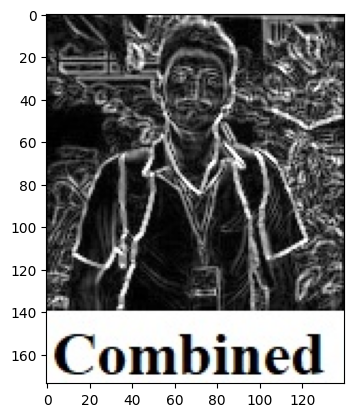

In [7]:
# Load the image from Google Drive
image_path = '/content/drive/MyDrive/MIT/Work/Machine_Learning/Google_Colab/Machine_Learning/Image_Descriptors/Image_Descriptors_HOG/Gradient.jpg'

# Read the image
image = plt.imread(image_path)

# Display the image
plt.imshow(image)
plt.show()

### **Step 3: WEIGHTED VOTES IN EACH CELL**
* Now that we have our gradient magnitude and orientation representations, we need to **divide our image into cells and block**.
* A **“cell” is a rectangular region defined by the number of pixels** that belong in each cell.
* For **example**, if we had a 140 x 140 image and defined our pixels_per_cell  as 4 x 4, we would thus have 35 x 35 = 1225 cells.
* If we defined our pixels_per_cell  as 28 x 28, we would have 5 x 5 = 25 total cells.
* Now, **for each of the cells in the image**, we need to **construct a histogram of oriented gradients** using our gradient magnitude |G| and orientation Ɵ mentioned above.
* But **before we construct this histogram**, we need to **define our number of orientations**.
* The **number of orientations  control the number of bins in the resulting histogram**.
* The **gradient angle** is **either** within the **range [0,180] (unsigned)** or **[0,360] (signed)**.
* In general, it’s **preferable to use unsigned gradients in the range [0,180] with orientations (or bins in histogram) somewhere in the range [9, 12]**. But depending on your application, using signed gradients over unsigned gradients can improve accuracy.
* Finally, **each pixel contributes a weighted vote to the histogram** — the **weight of the vote is simply the gradient magnitude |G| at the given pixel**.

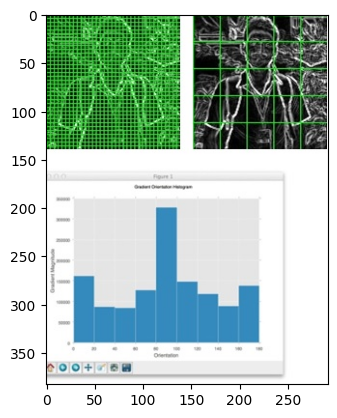

In [8]:
# Load the image from Google Drive
image_path = '/content/drive/MyDrive/MIT/Work/Machine_Learning/Google_Colab/Machine_Learning/Image_Descriptors/Image_Descriptors_HOG/HoG.jpg'

# Read the image
image = plt.imread(image_path)

# Display the image
plt.imshow(image)
plt.show()

### **Step 4: CONTRAST NORMALIZATION OVER BLOCKS**
* To **account for changes in illumination and contrast**, we can **normalize the gradient values locally**.
* This **requires grouping the “cells” together into larger**, connecting “**blocks**”.
* It is common for these **blocks to overlap**, **meaning that each cell contributes to the final feature vector more than once**.
* **Dalal and Triggs report** that using **either 2 x 2 or 3 x 3  cells_per_block  obtains reasonable accuracy** in most cases.
* Here is an **example** where we have taken an input region of an image, computed a gradient histogram for each cell, and then locally grouped the cells into overlapping blocks.
* For each of the cells in the current block we concatenate their corresponding gradient histograms, followed by either L1 or L2 normalizing the entire concatenated feature vector.
* Finally, after all blocks are normalized, we take the resulting histograms, concatenate them, and treat them as our final feature vector.

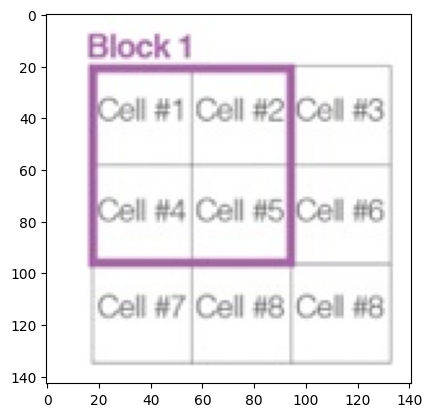

In [9]:
# Load the image from Google Drive
image_path = '/content/drive/MyDrive/MIT/Work/Machine_Learning/Google_Colab/Machine_Learning/Image_Descriptors/Image_Descriptors_HOG/CN.jpg'

# Read the image
image = plt.imread(image_path)

# Display the image
plt.imshow(image)
plt.show()

### **Step 5: COLLECTING ALL HISTOGRAMS OF ORIENTED GRADIENTS TO FORM THE FINAL FEATURE VECTOR**

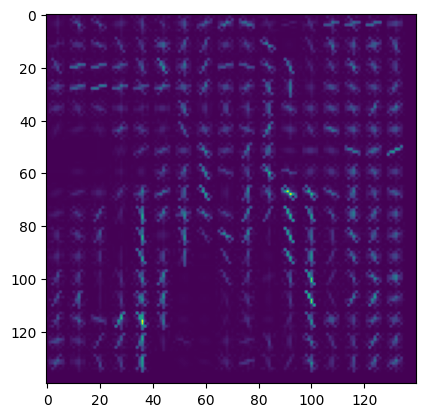

In [10]:
# Load the image from Google Drive
image_path = '/content/drive/MyDrive/MIT/Work/Machine_Learning/Google_Colab/Machine_Learning/Image_Descriptors/Image_Descriptors_HOG/HoG_1.jpg'

# Read the image
image = plt.imread(image_path)

# Display the image
plt.imshow(image)
plt.show()

### **Program: Identifying car logos using HOG descriptors**
* **Dataset:** The **car logo dataset** consists of **five brands of vehicles**: **Audi, Ford, Honda, Subaru,** and **Volkswagen.**
* The **goal** of this project is to:
    1. Extract HOG features from our training set to characterize and quantify each car logo.
    2. Train a machine learning classifier to distinguish between each car logo.
    3. Apply a classifier to recognize new, unseen car logos.

In [11]:
# import the necessary packages
from sklearn.neighbors import KNeighborsClassifier
from google.colab.patches import cv2_imshow
from skimage import feature
from imutils import paths
import imutils
import cv2

In [12]:
# initialize the data matrix and labels
# initialize data  and labels , two lists that will hold the HOG features and car brand name for
# each image in our training set, respectively.
data = []
labels = []

In [13]:
# loop over the image paths in the training set
# image path looks like this:  car_logos\audi\audi_01.png
# we are able to extract the make of the car by splitting the path and extracting the second sub-
# directory name, or in this case audi
for imagePath in paths.list_images("/content/drive/MyDrive/MIT/Work/Machine_Learning/Google_Colab/Machine_Learning/Image_Descriptors/Image_Descriptors_HOG/car_logos"):
	# extract the make of the car
	make = imagePath.split("/")[-2]
	# load the image, convert it to grayscale, and detect edges
	image = cv2.imread(imagePath)
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	edged = imutils.auto_canny(gray)

	# find contours in the edge map, keeping only the largest one, presumed to be the car logo
	(cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
	c = max(cnts, key=cv2.contourArea)

	# take the largest contour region, compute the bounding box, and extract the ROI.
	# extract the logo of the car and resize it to a canonical width and height (200,100)
	# having various widths and heights for your image can lead to HOG feature vectors of different sizes
	# Remember, our extracted feature vectors are supposed to characterize and represent
  # the visual contents of an image. And if our feature vectors are not the same
  # dimensionality, then they cannot be compared for similarity. And if we cannot compare
  # our feature vectors for similarity, we are unable to compare our two images at all.
	# Because of this, when extracting HOG features from a dataset of images, you’ll want
  # to define a canonical, known size that each image will be resized to. In many cases,
  # this means that you will be throwing away the aspect ratio of the image. Normally,
  # destroying the aspect ratio of an image should be avoided — but in this case we are
  # happy to do it, because it ensures (1) that each image in our dataset is described in a
  # consistent manner, and (2) each feature vector is of the same dimensionality.
	(x, y, w, h) = cv2.boundingRect(c)
	logo = gray[y:y + h, x:x + w]
	logo = cv2.resize(logo, (200, 100))

	# extract Histogram of Oriented Gradients from the logo
	H = feature.hog(logo, orientations=9, pixels_per_cell=(10, 10), cells_per_block=(2, 2), transform_sqrt=True)

	# Finally, given the HOG feature vector, we then update our data  matrix and labels  list
  # with the feature vector and car make, respectively.
	data.append(H)
	labels.append(make)

In [14]:
# Given our data and labels we can now train our classifier
# To recognize and distinguish the difference between our five car brands, we are going to use
# scikit-learns KNeighborsClassifier.
# The k-nearest neighbor classifier is a type of “lazy learning” algorithm where nothing is
# actually “learned”. Instead, the k-Nearest Neighbor (k-NN) training phase simply accepts a set
# of feature vectors and labels and stores them — that’s it! Then, when it is time to classify a
# new feature vector, it accepts the feature vector, computes the distance to all stored feature
# vectors (normally using the Euclidean distance, but any distance metric or similarity metric can
# be used), sorts them by distance, and returns the top k “neighbors” to the input feature vector.
# From there, each of the k neighbors vote as to what they think the label of the classification is.
# In our case, we are simply passing the HOG feature vectors and labels to our k-NN algorithm
# and ask it to report back what is the closest logo to our query features using k=1 neighbors.
print ("[INFO] training classifier...")
model = KNeighborsClassifier(n_neighbors=1)
model.fit(data, labels)
print ("[INFO] evaluating...")

[INFO] training classifier...
[INFO] evaluating...


1


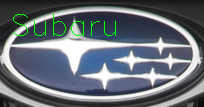

2


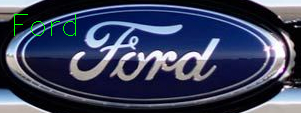

3


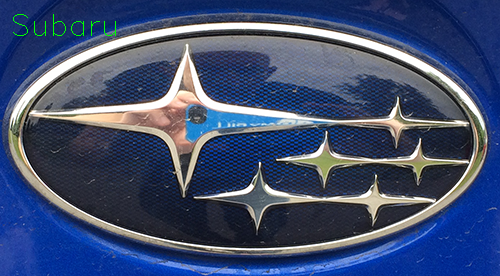

4


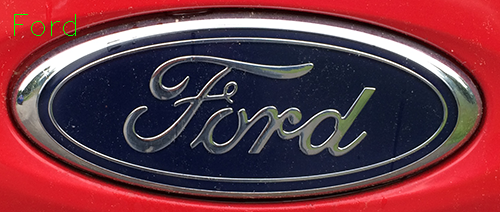

5


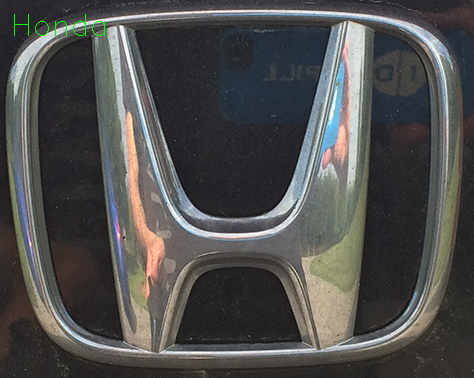

6


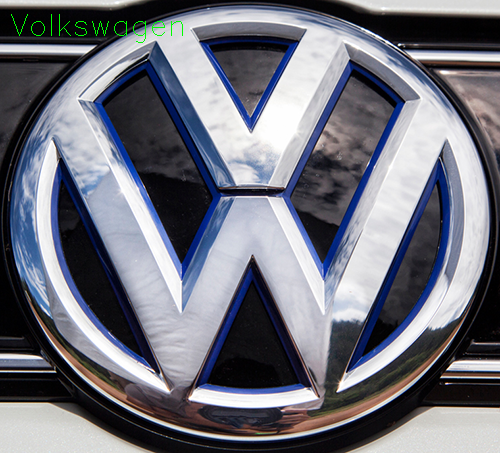

7


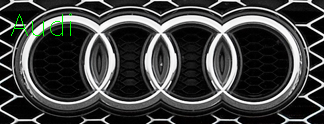

In [15]:
# loop over the test dataset
for (i, imagePath) in enumerate(paths.list_images("/content/drive/MyDrive/MIT/Work/Machine_Learning/Google_Colab/Machine_Learning/Image_Descriptors/Image_Descriptors_HOG/test_images")):
		# load the test image, convert it to grayscale, and resize it to the canonical size
		image = cv2.imread(imagePath)
		gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
		logo = cv2.resize(gray, (200, 100))

		# extract Histogram of Oriented Gradients from the test image and predict the make of the car
		# call to our k-NN classifier, passing in our HOG feature vector for the current testing
  	# image and asking the classifier what it thinks the logo is.
		H = feature.hog(logo, orientations=9, pixels_per_cell=(10, 10), cells_per_block=(2, 2), transform_sqrt=True)
		pred = model.predict(H.reshape(1, -1))[0]

  	# draw the prediction on the test image and display it
		cv2.putText(image, pred.title(), (10, 35), cv2.FONT_HERSHEY_SIMPLEX, 1.0,(0, 255, 0), 1)
		print (i+1)
		cv2_imshow(image)
		cv2.waitKey(0)
cv2.destroyAllWindows()